In [92]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df = pd.read_csv('../data/data.csv', encoding= 'unicode_escape', dtype={'CustomerID': str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [119]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [120]:
df['CustomerID'].nunique()

4372

In [121]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [122]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [153]:
df = df[df['UnitPrice'] >= 0]

In [154]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_93072/876306190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


### Set the sample period to 6 months

In [155]:
df = df[df['InvoiceDate'] > df['InvoiceDate'].max() - dt.timedelta(days=180)]

In [156]:
most_recent_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
df['Recency'] = most_recent_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')
df['Recency'] = df['Recency'].dt.days
df['Recency'] = pd.to_numeric(df['Recency'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
223317,556480,21034,REX CASH+CARRY JUMBO SHOPPER,1,2011-06-12 12:55:00,0.95,13617,United Kingdom,40.0
223318,556480,82482,WOODEN PICTURE FRAME WHITE FINISH,3,2011-06-12 12:55:00,2.55,13617,United Kingdom,40.0
223319,556480,22798,ANTIQUE GLASS DRESSING TABLE POT,4,2011-06-12 12:55:00,2.95,13617,United Kingdom,40.0
223320,556480,23321,SMALL WHITE HEART OF WICKER,4,2011-06-12 12:55:00,1.69,13617,United Kingdom,40.0
223321,556480,85107,CUT GLASS T-LIGHT HOLDER OCTAGON,1,2011-06-12 12:55:00,2.55,13617,United Kingdom,40.0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,1.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1.0


In [157]:
df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')

In [158]:
df['Monetary'] = df['Quantity'] * df['UnitPrice']
df['Monetary'] = df.groupby('CustomerID')['Monetary'].transform('sum')

In [159]:
df = df[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

In [160]:
df = df.drop_duplicates(subset='CustomerID')
df

,CustomerID,Recency,Frequency,Monetary
223317,13617,40.0,3.0,544.18
223330,16115,10.0,5.0,1157.07
223357,17242,108.0,2.0,1135.04
223386,14823,180.0,1.0,110.78
223410,16938,9.0,4.0,1635.53
...,...,...,...,...
538907,15898,1.0,1.0,385.89
539058,13404,1.0,1.0,34.68
540092,13077,1.0,1.0,151.83
540421,16446,1.0,2.0,0.00


In [161]:
df = df[df['Monetary'] > 0]

In [162]:
df.describe()

,Recency,Frequency,Monetary
count,3464.000000,3464.000000,3.464000e+03
mean,47.560912,3.597864,1.432202e+03
std,45.188057,5.873113,5.788611e+03
min,1.000000,1.000000,1.776357e-15
25%,11.000000,1.000000,2.795750e+02
50%,31.500000,2.000000,5.676900e+02
75%,71.000000,4.000000,1.265737e+03
max,180.000000,168.000000,1.644671e+05


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3464 entries, 223317 to 541768
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3464 non-null   object 
 1   Recency     3464 non-null   float64
 2   Frequency   3464 non-null   float64
 3   Monetary    3464 non-null   float64
dtypes: float64(3), object(1)
memory usage: 135.3+ KB


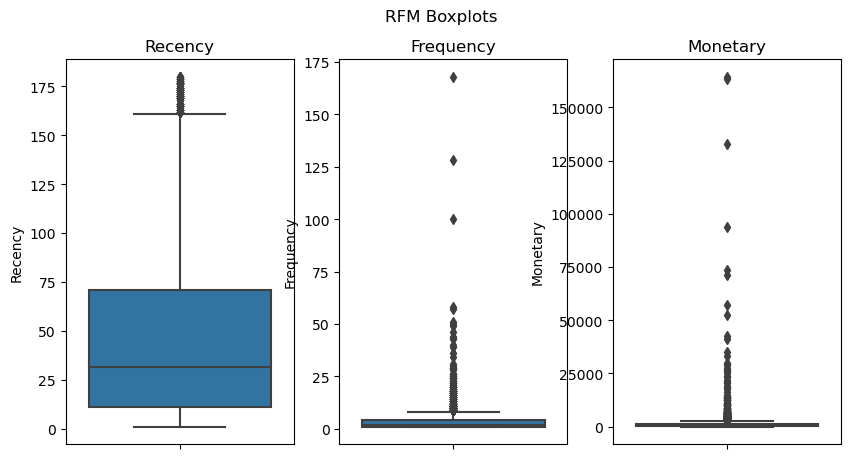

In [164]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

sns.boxplot(y='Recency', data=df, ax=axs[0])
axs[0].set_title('Recency')

sns.boxplot(y='Frequency', data=df, ax=axs[1])
axs[1].set_title('Frequency')

sns.boxplot(y='Monetary', data=df, ax=axs[2])
axs[2].set_title('Monetary')

fig.suptitle('RFM Boxplots')

plt.show()

In [168]:
df['Recency_rank'] = pd.cut(df['Recency'], bins = [-1,
                                                           np.percentile(df['Recency'], 20),
                                                           np.percentile(df['Recency'], 40),
                                                           np.percentile(df['Recency'], 60),
                                                           np.percentile(df['Recency'], 80),
                                                           df['Recency'].max()], labels=[5, 4, 3, 2, 1]).astype('int')

df['Frequency_rank'] = pd.cut(df['Frequency'], bins = [-1,
                                                           np.percentile(df['Frequency'], 20),
                                                           np.percentile(df['Frequency'], 40),
                                                           np.percentile(df['Frequency'], 60),
                                                           np.percentile(df['Frequency'], 80),
                                                           df['Frequency'].max()], labels=[1, 2, 3, 4, 5]).astype('int')


df['Monetary_rank'] = pd.cut(df['Monetary'], bins = [-1,
                                                           np.percentile(df['Monetary'], 20),
                                                           np.percentile(df['Monetary'], 40),
                                                           np.percentile(df['Monetary'], 60),
                                                           np.percentile(df['Monetary'], 80),
                                                           df['Monetary'].max()], labels=[1, 2, 3, 4, 5]).astype('int')

df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_93072/3137960158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recency_rank'] = pd.cut(df['Recency'], bins = [-1,
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_93072/3137960158.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency_rank'] = pd.cut(df['Frequency'], bins = [-1,
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_93072/3137960158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a c

,CustomerID,Recency,Frequency,Monetary,Recency_rank,Frequency_rank,Monetary_rank
223317,13617,40.0,3.0,544.18,3,3,3
223330,16115,10.0,5.0,1157.07,4,4,4
223357,17242,108.0,2.0,1135.04,1,2,4
223386,14823,180.0,1.0,110.78,1,1,1
223410,16938,9.0,4.0,1635.53,5,4,5
...,...,...,...,...,...,...,...
538812,14569,1.0,1.0,227.39,5,1,2
538907,15898,1.0,1.0,385.89,5,1,2
539058,13404,1.0,1.0,34.68,5,1,1
540092,13077,1.0,1.0,151.83,5,1,1


In [170]:
df.groupby(['Recency_rank']).mean()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_93072/3534063032.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Recency_rank']).mean()


,Recency,Frequency,Monetary,Frequency_rank,Monetary_rank
Recency_rank,,,,,
1,124.059334,1.555716,489.581158,1.510854,2.215630
2,61.883929,1.970238,646.365420,1.866071,2.617560
3,33.327460,2.882526,1083.376374,2.446402,2.948605
4,16.376081,3.938040,1428.507565,2.982709,3.272334
5,4.654270,7.393939,3387.503650,3.720386,3.888430


In [171]:
df.groupby(['Monetary_rank']).mean()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_93072/397688042.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Monetary_rank']).mean()


,Recency,Frequency,Monetary,Recency_rank,Frequency_rank
Monetary_rank,,,,,
1,72.816739,1.272727,139.537014,2.329004,1.262626
2,59.186147,1.616162,321.188876,2.581530,1.581530
3,48.202312,2.307803,573.669727,2.894509,2.250000
4,35.835498,3.702742,1085.299394,3.346320,3.226551
5,21.764791,9.088023,5040.078470,3.981241,4.287157


In [172]:
segment = []
for i, row in df[['Recency_rank', 'Frequency_rank', 'Monetary_rank']].iterrows():
    if row['Recency_rank'] <= 2 and row['Frequency_rank'] <= 2:
      segment.append('Hibernating')
    elif row['Recency_rank'] <=2 and row['Frequency_rank'] >= 4 and row['Monetary_rank'] >= 4:
      segment.append("Don't lose them")
    elif row['Recency_rank'] <=2 and row['Frequency_rank'] >= 3:
      segment.append('At risk')
    elif row['Recency_rank'] == 3 and row['Frequency_rank'] <= 2:
      segment.append('About to sleep')
    elif row['Recency_rank'] == 3 and row['Frequency_rank'] == 3:
      segment.append('Need attention')
    elif row['Recency_rank'] == 4 and row['Frequency_rank'] == 1:
      segment.append('Promising')
    elif row['Recency_rank'] == 5 and row['Frequency_rank'] == 1:
      segment.append('New')
    elif row['Recency_rank'] >= 4 and row['Frequency_rank'] >= 4 and row['Frequency_rank'] >=4 and row['Recency_rank'] + row['Frequency_rank'] + row['Monetary_rank'] > 12:
      segment.append('Champions')
    elif row['Recency_rank'] >= 3 and row['Frequency_rank'] >= 3 and row['Monetary_rank'] >= 3:
      segment.append('Loyal')
    else:
      segment.append('Potential Loyal')

df['segment'] = segment
df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_93072/615494372.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segment'] = segment


,CustomerID,Recency,Frequency,Monetary,Recency_rank,Frequency_rank,Monetary_rank,segment
223317,13617,40.0,3.0,544.18,3,3,3,Need attention
223330,16115,10.0,5.0,1157.07,4,4,4,Loyal
223357,17242,108.0,2.0,1135.04,1,2,4,Hibernating
223386,14823,180.0,1.0,110.78,1,1,1,Hibernating
223410,16938,9.0,4.0,1635.53,5,4,5,Champions
...,...,...,...,...,...,...,...,...
538812,14569,1.0,1.0,227.39,5,1,2,New
538907,15898,1.0,1.0,385.89,5,1,2,New
539058,13404,1.0,1.0,34.68,5,1,1,New
540092,13077,1.0,1.0,151.83,5,1,1,New


In [173]:
df.to_csv('../data/rfm_output.csv', index=False)

In [175]:
df.groupby('Recency_rank')['Recency'].mean().reset_index()

,Recency_rank,Recency
0,1,124.059334
1,2,61.883929
2,3,33.327460
3,4,16.376081
4,5,4.654270


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3464 entries, 223317 to 541768
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      3464 non-null   object 
 1   Recency         3464 non-null   float64
 2   Frequency       3464 non-null   float64
 3   Monetary        3464 non-null   float64
 4   Recency_rank    3464 non-null   int64  
 5   Frequency_rank  3464 non-null   int64  
 6   Monetary_rank   3464 non-null   int64  
 7   segment         3464 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 243.6+ KB


In [183]:
df.groupby('segment')['CustomerID'].nunique().reset_index()

,segment,CustomerID
0,About to sleep,390
1,At risk,155
2,Champions,599
3,Don't lose them,79
4,Hibernating,1129
5,Loyal,477
6,Need attention,111
7,New,70
8,Potential Loyal,302
9,Promising,152


In [185]:
df.groupby('segment').mean().reset_index()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_93072/2186947567.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('segment').mean().reset_index()


,segment,Recency,Frequency,Monetary,Recency_rank,Frequency_rank,Monetary_rank
0,About to sleep,33.782051,1.392308,475.418513,3.000000,1.392308,2.241026
1,At risk,81.961290,3.322581,792.315097,1.658065,3.232258,3.141935
2,Champions,7.595993,10.188648,4834.892337,4.706177,4.739566,4.739566
3,Don't lose them,69.481013,5.468354,1910.898608,1.734177,4.367089,4.493671
4,Hibernating,96.650133,1.286094,441.885130,1.453499,1.286094,2.168291
5,Loyal,19.899371,4.503145,1592.368262,3.846960,3.796646,3.890985
6,Need attention,33.234234,3.000000,921.800180,3.000000,3.000000,3.369369
7,New,4.514286,1.000000,330.389286,5.000000,1.000000,1.742857
8,Potential Loyal,12.026490,2.367550,593.568411,4.417219,2.281457,2.592715
9,Promising,17.013158,1.000000,281.007171,4.000000,1.000000,1.671053


In [187]:
import plotly.io as pio
plotly_template = pio.templates["plotly_dark"]
plotly_template.layout

Layout({
    'annotationdefaults': {'arrowcolor': '#f2f5fa', 'arrowhead': 0, 'arrowwidth': 1},
    'autotypenumbers': 'strict',
    'coloraxis': {'colorbar': {'outlinewidth': 0, 'ticks': ''}},
    'colorscale': {'diverging': [[0, '#8e0152'], [0.1, '#c51b7d'], [0.2,
                                 '#de77ae'], [0.3, '#f1b6da'], [0.4, '#fde0ef'],
                                 [0.5, '#f7f7f7'], [0.6, '#e6f5d0'], [0.7,
                                 '#b8e186'], [0.8, '#7fbc41'], [0.9, '#4d9221'],
                                 [1, '#276419']],
                   'sequential': [[0.0, '#0d0887'], [0.1111111111111111,
                                  '#46039f'], [0.2222222222222222, '#7201a8'],
                                  [0.3333333333333333, '#9c179e'],
                                  [0.4444444444444444, '#bd3786'],
                                  [0.5555555555555556, '#d8576b'],
                                  [0.6666666666666666, '#ed7953'],
                           